In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('Set1')

In [2]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Student prediction data\customer_segmentation_data.csv")
df.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


Description of the features
- minutes watched	The number of minutes a student has watched since joining the program
		
- CLV	The Customer Lifetime Value, or CLV, shows the total amount of revenue generated by that customer
		
		
- Region	This is the geographical region where the student comes from.
	USA, Canada, United Kingdom, Australia (0)
	Western Europe (1)	
	Rest of the World (2)	
		
- Channel	This is the channel through which the customer has learned about the 365 program
		1	Google	
		2	Facebook	
		3	YouTube	
		4	LinkedIn	
		5	Twitter	
		6	Instagram	
		7	Friend	
		8	Other


In [3]:
cols = ['region','channel']

for col in cols:
    print(f'The unique value {col} :{df[col].nunique()}')

The unique value region :3
The unique value channel :8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [5]:
df.describe()

,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


In [6]:
df.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

There are 109 missing values in the minutes_watched column. These amount might represent the number of people that might have registered or signed up but did not watch any lecture. We will set this to be 0.

In [7]:
#Checking for the percentage of the data that has missing value. 
#Although the percentage is small, we can drop it but since we have a reasonable filling idea, we can as well fill it with 0


def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan


percent_nan = percent_missing(df)
percent_nan


df['minutes_watched'] = df['minutes_watched'].fillna(0)
df['minutes_watched'] = df['minutes_watched'].astype('int')

[2 0 1]


<Axes: xlabel='region', ylabel='count'>

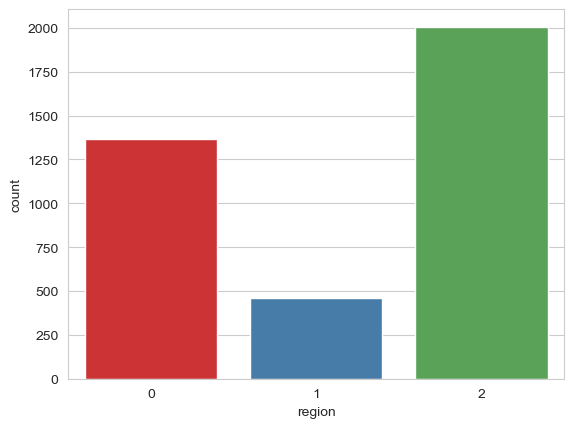

In [8]:
#Countplot to count the instances of the region occurance
print(df.region.unique())
sns.countplot(df,x='region')

Region 2 has the highest number of registered individual followed by region 0 then region 1

<Axes: xlabel='channel', ylabel='count'>

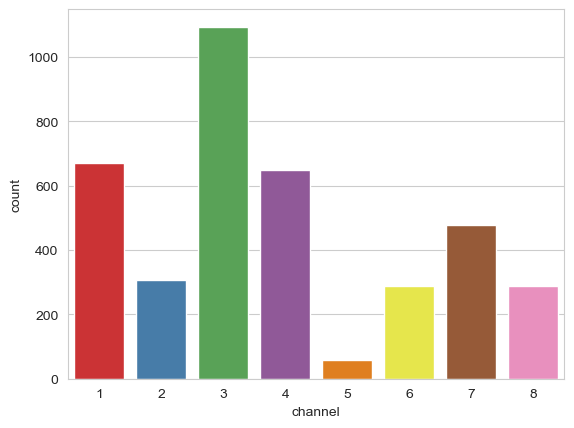

In [9]:
#Countplot for channel
sns.countplot(df,x='channel')

A high number of customers learnt about the 365 program from Youtube, Google and Linkedin. Twitter is the least channel.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


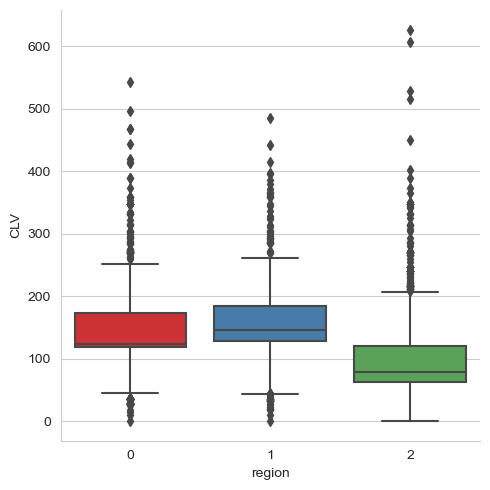

In [10]:
#Analyzing how the region impact CLV
sns.catplot(data=df,x='region',y='CLV',kind='box')

Region 1 has the highest median CLV with region 2 having the lowest median. From the graph, we can infer that the higher median for region 1 shows that customers in this region are valuable. Also there is a greater distribution for region 1 which represents more diversity in customer value. This could suggest that Region 1 has a mix of both low-value and high-value customers. iven the higher median and broader distribution, Region 1 could be a key area to focus on for retention strategies to maintain high-value customers and upselling strategies to increase the CLV of lower-value customers

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


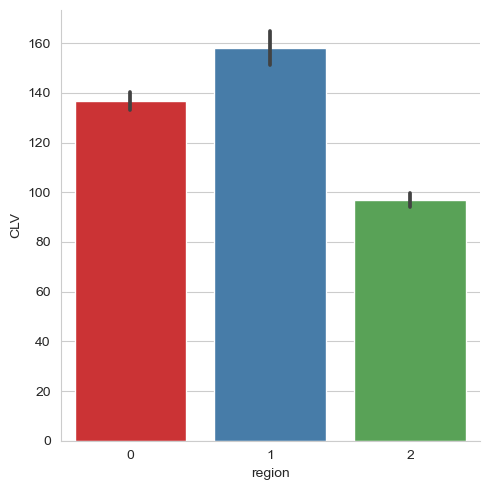

In [11]:
sns.catplot(data=df,x='region',y='CLV',kind='bar',estimator='mean')

<Axes: xlabel='CLV', ylabel='Count'>

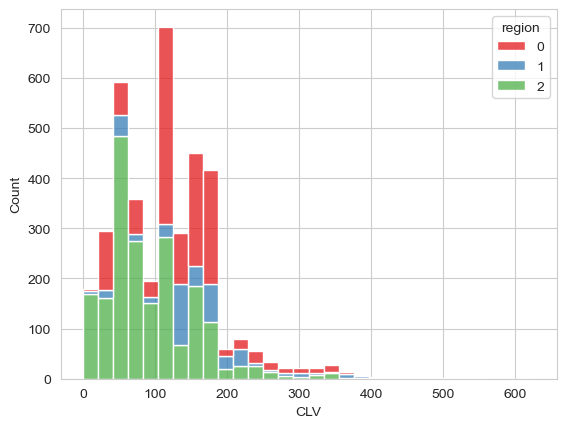

In [12]:
sns.histplot(data=df,x='CLV',bins=30,hue='region',multiple='stack',palette='Set1')

This graph is a stacked histogram showing the distribution of a variable labeled "CLV" (Customer Lifetime Value) across different regions, indicated by three categories (0, 1, 2) with different colors. The histogram reveals that most CLV values fall between 0 and 200, with the green region (2) being the most prominent in the lower range, while the red region (0) dominates in the mid-range of CLV values. The blue region (1) has a relatively smaller representation across the different CLV bins. 

Region 2 (green) has a significant number of customers with lower CLV values, particularly in the 0-100 range.
Region 0 (red) also has many customers in the lower CLV range but shows a higher count in the 100-200 CLV range compared to other regions.
Region 1 (blue) has fewer customers overall but is spread relatively evenly across the lower CLV ranges.Although the overall number of customers is lower, Region 1 shows some presence in the mid-range CLV values (100-200). This suggests that there are some customers in this region with a moderately high lifetime value, albeit fewer in numbe

Region 0 (red) contributes heavily to higher CLV values (100-200), indicating that customers from this region may be more valuable on average than those from Regions 1 and 2.
Region 2 (green) dominates in the lowest CLV range (0-100), which could suggest either a larger customer base or customers with lower spending or shorter lifetime value

In [13]:
df.groupby('region')['CLV'].sum()

region
0    186620.82
1     72903.65
2    194359.48
Name: CLV, dtype: float64

The higher median CLV indicates that, on average, individual customers in Region 1 are more valuable than those in Regions 0 and 2. This suggests that Region 1 has a relatively affluent or engaged customer base, leading to higher spending or longer customer lifetimes on an individual level.
Despite the higher median CLV, Region 1 contributes less to the total CLV, which implies that the region likely has a smaller customer base. This means that while each customer is valuable, there aren’t enough customers to make a significant impact on the total revenue

<Axes: xlabel='channel'>

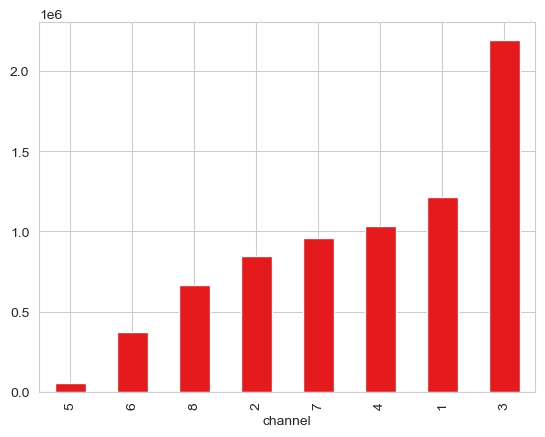

In [14]:
df.groupby('channel')['minutes_watched'].sum().sort_values().plot(kind='bar')

(0.0, 50000.0)

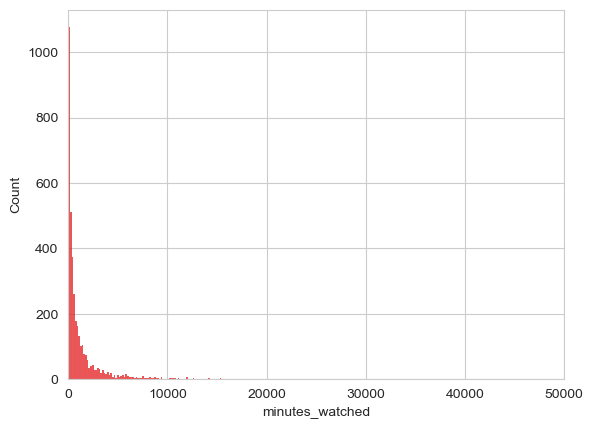

In [15]:
sns.histplot(data=df,x='minutes_watched')
plt.xlim(0,50000)

<Axes: xlabel='minutes_watched', ylabel='CLV'>

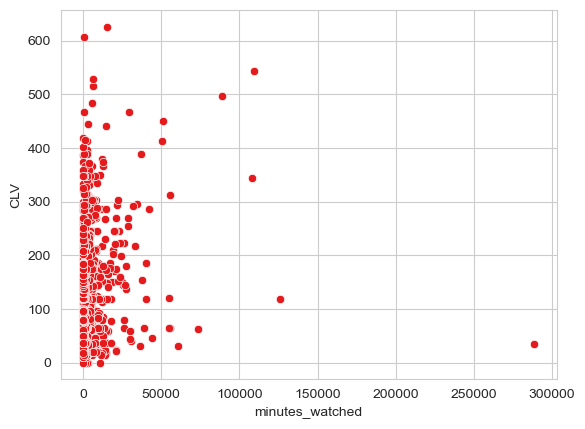

In [16]:
sns.scatterplot(data=df,y='CLV',x='minutes_watched')

<Axes: >

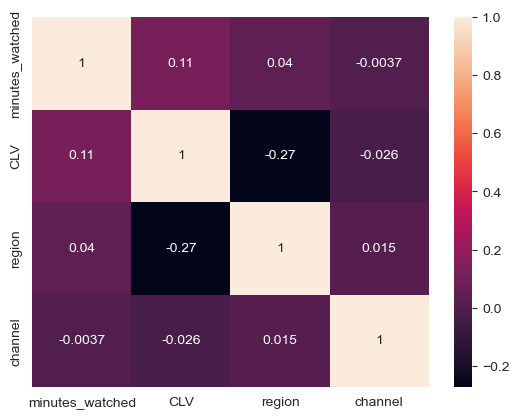

In [17]:
sns.heatmap(df.corr(),annot=True)

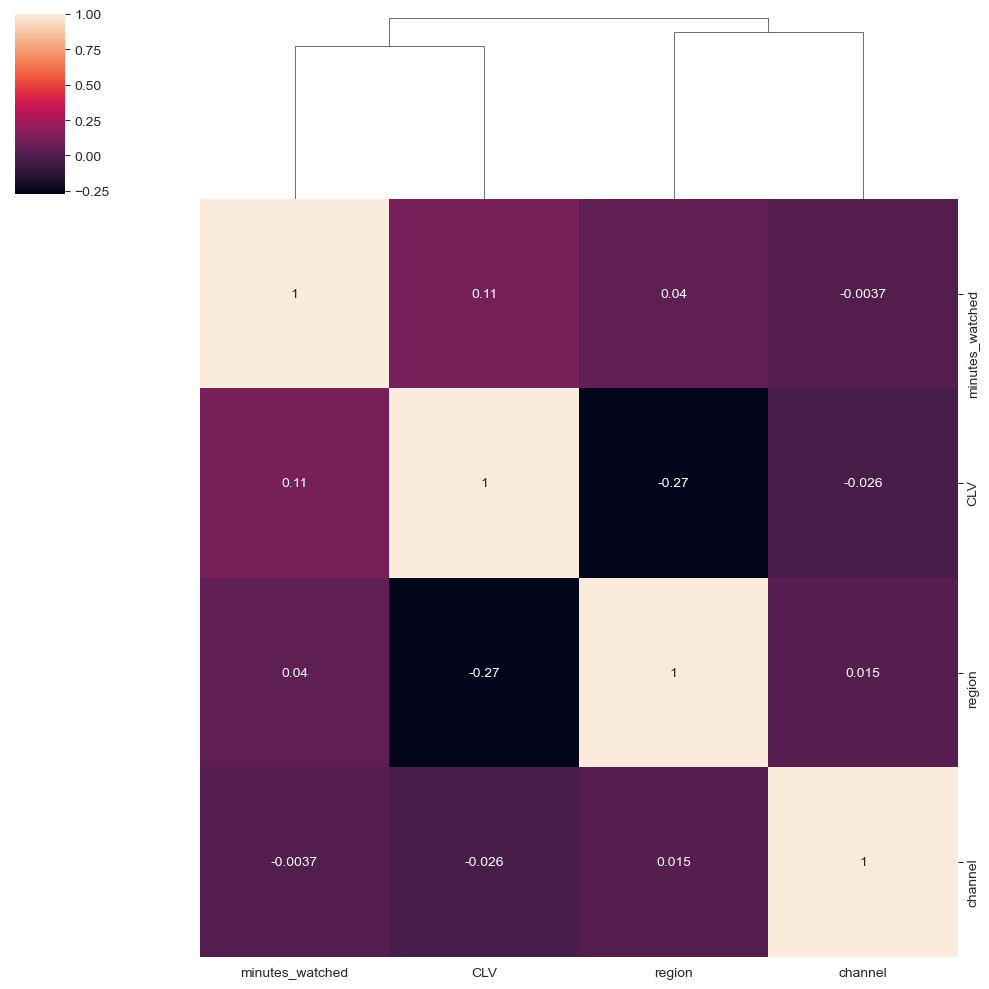

In [18]:
sns.clustermap(df.corr(),annot=True,row_cluster=False)

In [19]:
df_dbscan = df.copy()

In [20]:
drop_ind = df_dbscan[(df_dbscan['minutes_watched'] > 80000) | (df_dbscan['CLV']>=600)].index

In [21]:
drop_ind

Index([86, 250, 365, 558, 1096, 1322, 1611], dtype='int64')

In [22]:
df_dbscan = df_dbscan.drop(drop_ind,axis=0)

In [23]:
len(df_dbscan)

3827

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaled_df_dbscan = scaler.fit_transform(df_dbscan)

In [26]:
df_scaled_dscan = pd.DataFrame(scaled_df_dbscan,columns=df_dbscan.columns)

In [27]:
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.cluster.hierarchy import dendrogram,linkage

In [28]:
X = linkage(df_scaled_dscan,method='ward')

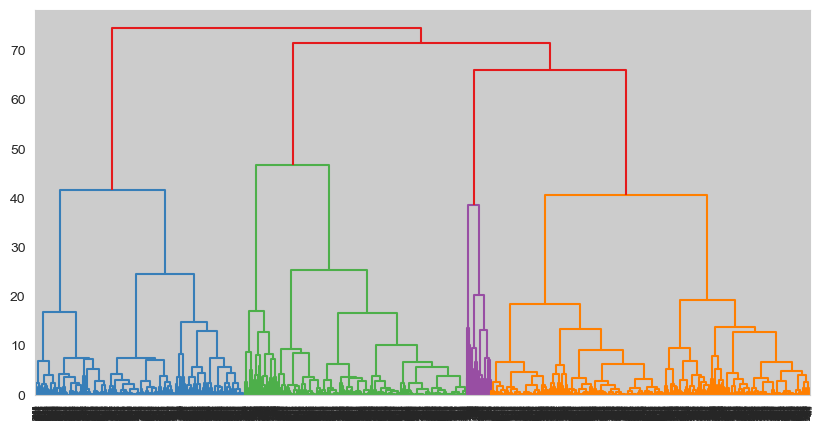

In [29]:
plt.figure(figsize=(10,5))
dendrogram(X)
plt.show()

In [30]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [31]:
k_values = range(2, 15)  # For example, testing k from 2 to 10
silhouette_scores = []

# Loop through each k value
for k in k_values:
    # Perform hierarchical clustering
    clusterer = AgglomerativeClustering(n_clusters=k)
    cluster_labels = clusterer.fit_predict(df_scaled_dscan)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_scaled_dscan, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Number of clusters: {k}, Silhouette Score: {silhouette_avg:.3f}')

# Find the best number of clusters
best_k = k_values[np.argmax(silhouette_scores)]
print(f'Best number of clusters: {best_k}')

Number of clusters: 2, Silhouette Score: 0.243
Number of clusters: 3, Silhouette Score: 0.303
Number of clusters: 4, Silhouette Score: 0.326
Number of clusters: 5, Silhouette Score: 0.341
Number of clusters: 6, Silhouette Score: 0.349
Number of clusters: 7, Silhouette Score: 0.348
Number of clusters: 8, Silhouette Score: 0.352
Number of clusters: 9, Silhouette Score: 0.345
Number of clusters: 10, Silhouette Score: 0.338
Number of clusters: 11, Silhouette Score: 0.340
Number of clusters: 12, Silhouette Score: 0.338
Number of clusters: 13, Silhouette Score: 0.324
Number of clusters: 14, Silhouette Score: 0.327
Best number of clusters: 8


In [32]:
ssd = []
silhoutte = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_scaled_dscan)
    ssd.append(kmeans.inertia_)
    silhoutte.append(silhouette_score(df_scaled_dscan,kmeans.labels_))

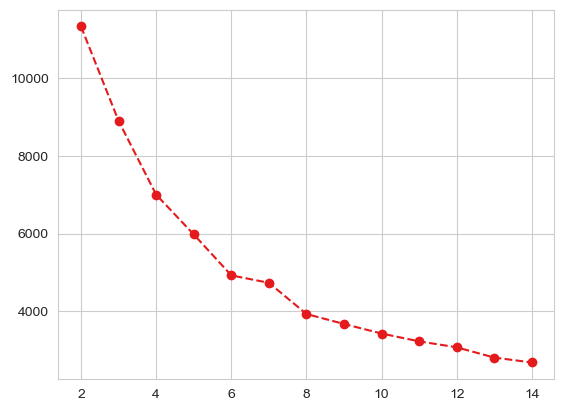

In [33]:
plt.plot(range(2,15),ssd,'o--')

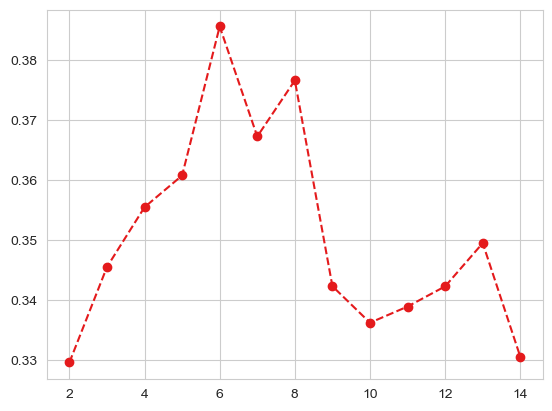

In [34]:
plt.plot(range(2,15),silhoutte,'o--')

In [35]:
model = KMeans(n_clusters=6,random_state=42)
data = model.fit_predict(df_scaled_dscan)

In [36]:
df_dbscan['cluster'] = data
cluster_0 = df_dbscan[df_dbscan['cluster']==0]
cluster_1 = df_dbscan[df_dbscan['cluster']==1]
cluster_2 = df_dbscan[df_dbscan['cluster']==2]
cluster_3 = df_dbscan[df_dbscan['cluster']==3]
cluster_4 = df_dbscan[df_dbscan['cluster']==4]
cluster_5 = df_dbscan[df_dbscan['cluster']==5]
#cluster_6 = df_dbscan[df_dbscan['cluster']==6]
#cluster_7 = df_dbscan[df_dbscan['cluster']==7]

In [37]:
df_dbscan.groupby('cluster')['CLV'].count().sort_values(ascending=False)

cluster
1    1367
0    1095
3     596
4     459
5     254
2      56
Name: CLV, dtype: int64

In [38]:
df_dbscan.groupby('cluster')['CLV'].count().sort_values(ascending=False)/len(df_dbscan)

cluster
1    0.357199
0    0.286125
3    0.155736
4    0.119937
5    0.066371
2    0.014633
Name: CLV, dtype: float64

In [39]:
cluster_1.channel.unique()

array([2, 3, 4, 1], dtype=int64)

In [40]:
cluster_1.describe()

,minutes_watched,CLV,region,channel,cluster
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.0
mean,1372.102414,85.646935,1.964155,2.677396,1.0
std,2242.752450,45.871707,0.185971,1.112531,0.0
min,0.000000,0.000000,1.000000,1.000000,1.0
25%,177.500000,62.575000,2.000000,2.000000,1.0
50%,551.000000,72.560000,2.000000,3.000000,1.0
75%,1498.000000,119.000000,2.000000,4.000000,1.0
max,15260.000000,192.220000,2.000000,4.000000,1.0


In [41]:
df_dbscan.groupby('cluster')[['minutes_watched','CLV']].mean().sort_values(by='minutes_watched',ascending=False)

,minutes_watched,CLV
cluster,,
2,30941.875000,179.184643
5,2589.814961,277.359449
3,1388.041946,85.407383
1,1372.102414,85.646935
4,1030.958606,134.185403
0,951.924201,128.820055


<Axes: xlabel='minutes_watched', ylabel='CLV'>

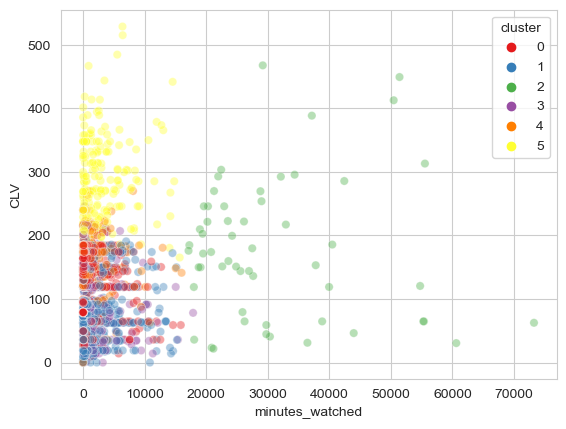

In [66]:
sns.scatterplot(data=df_dbscan,x='minutes_watched',y='CLV',hue='cluster',palette='Set1',alpha=0.4)

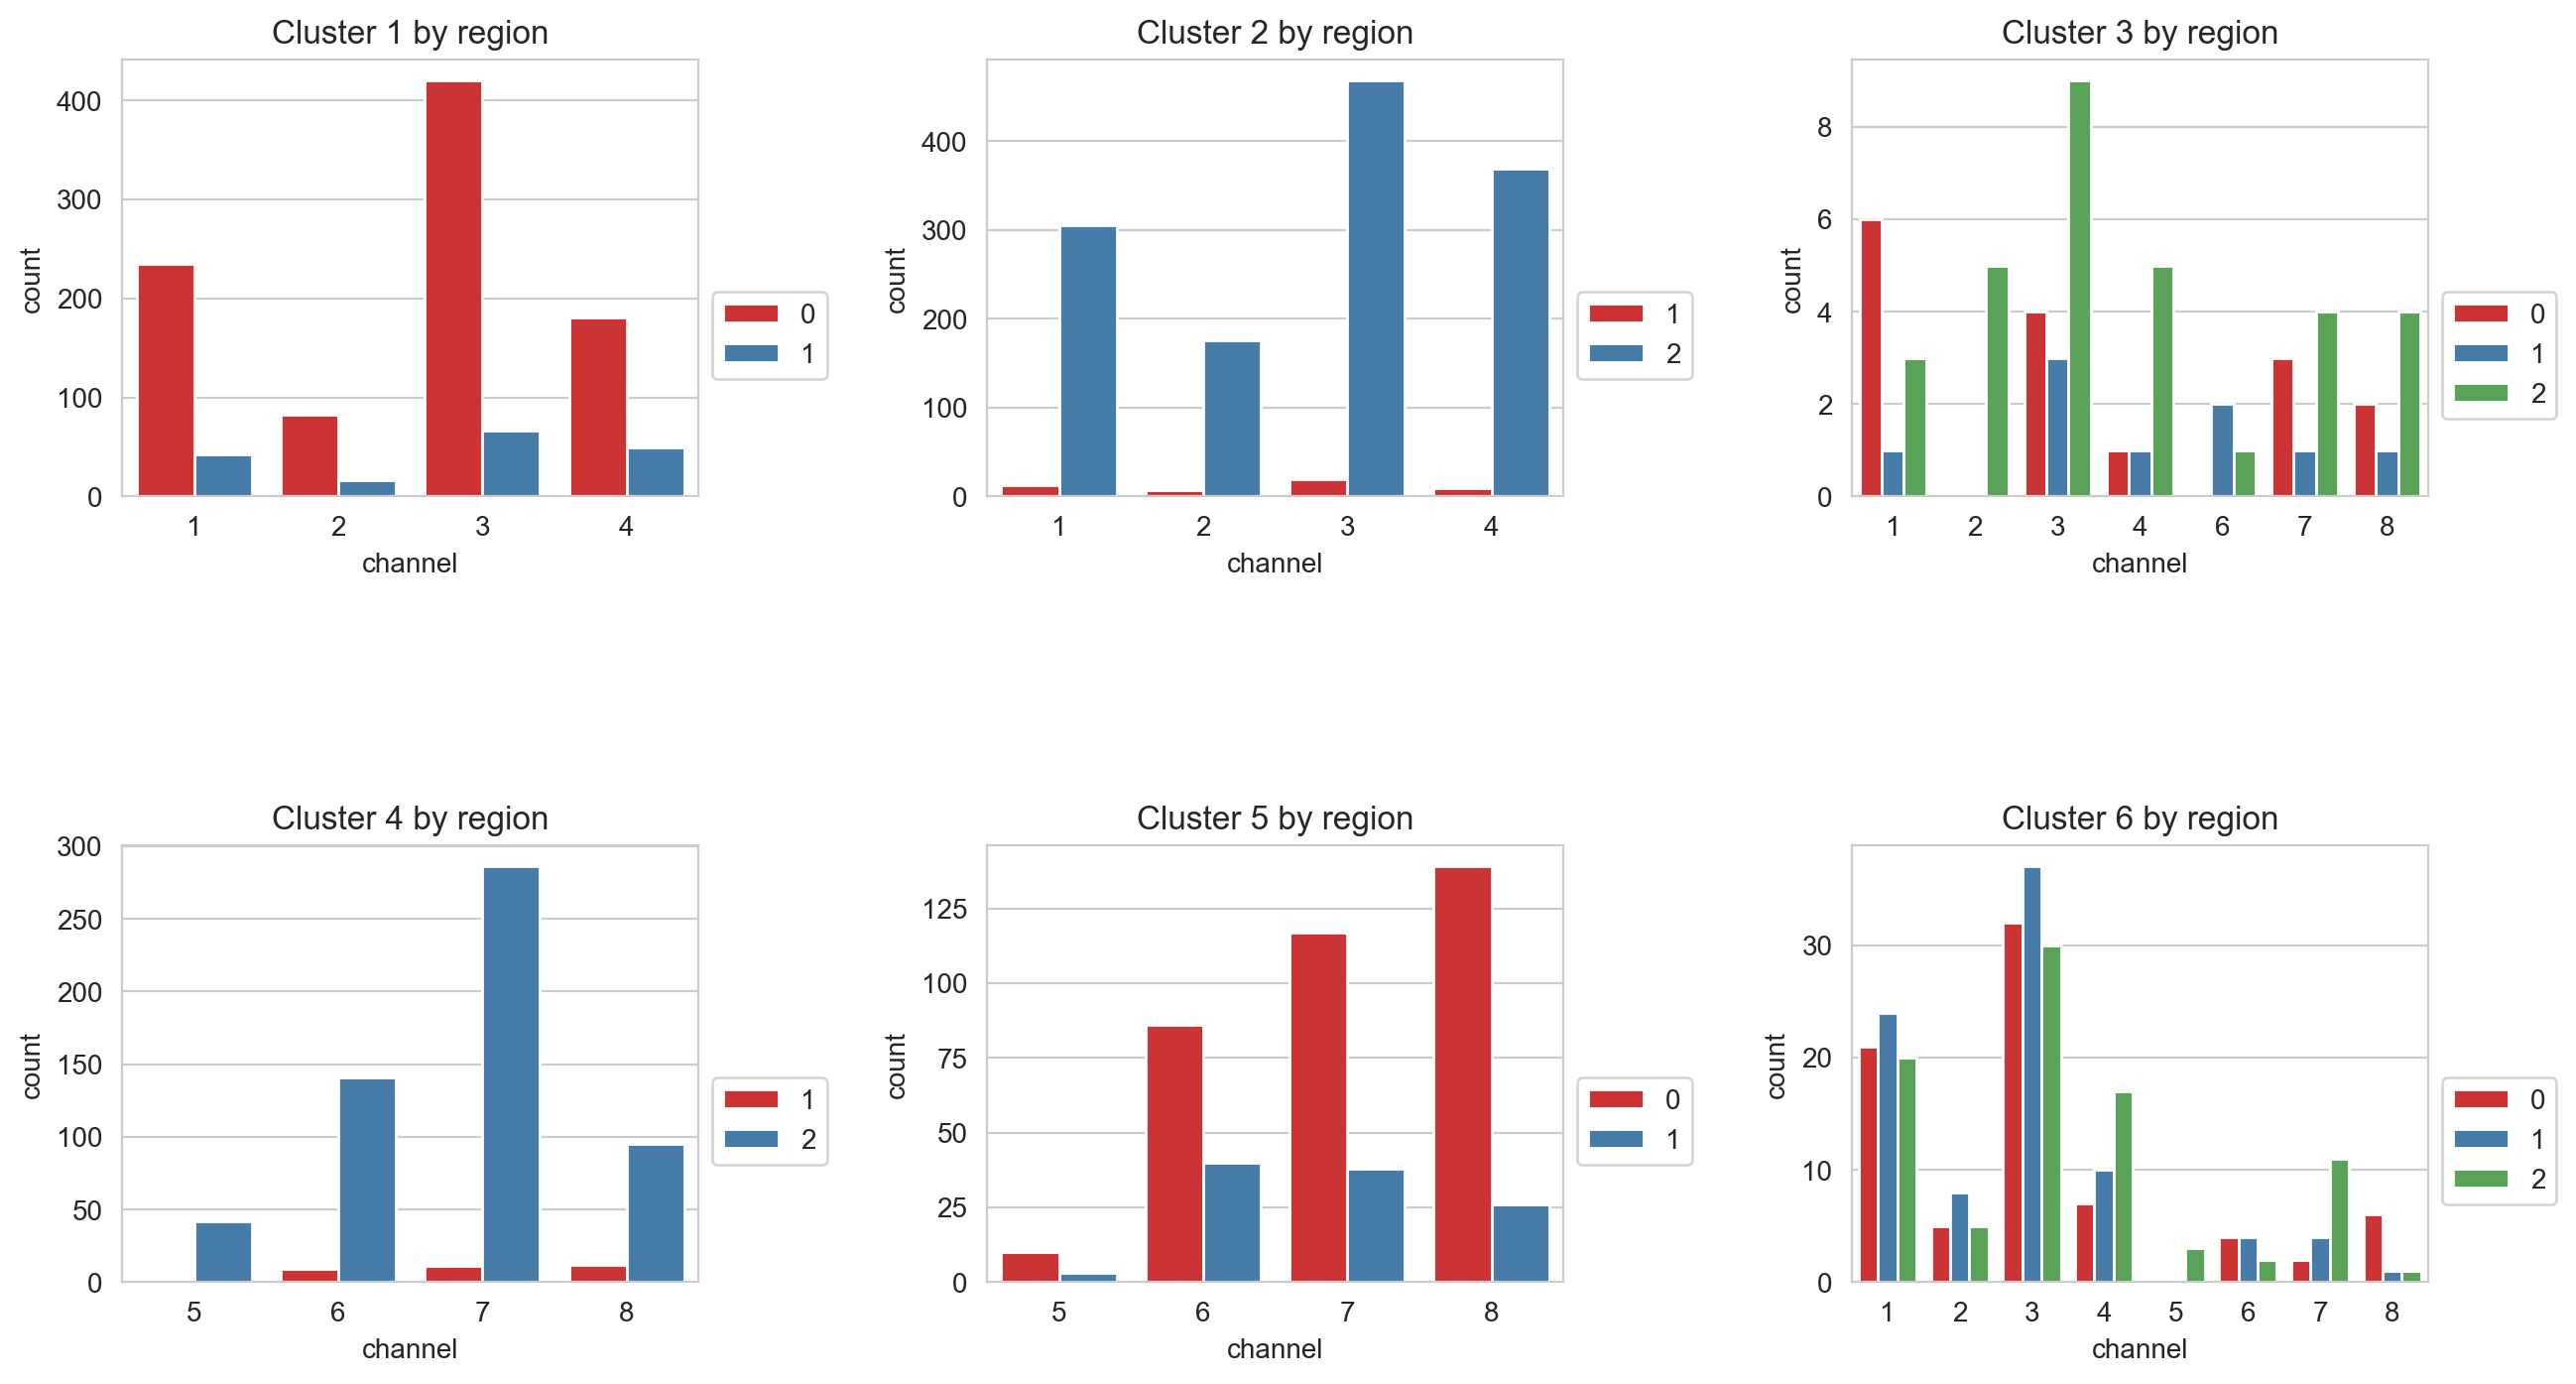

In [43]:
f,ax = plt.subplots(2,3,figsize=(15,8),dpi=200)
sns.countplot(data=cluster_0,x='channel',hue='region',ax=ax[0][0])
ax[0][0].set_title('Cluster 1 by region')
ax[0][0].legend(loc='best',bbox_to_anchor=(1.0,0.5))
sns.countplot(data=cluster_1,x='channel',hue='region',ax=ax[0][1])
ax[0][1].set_title('Cluster 2 by region')
ax[0][1].legend(loc='best',bbox_to_anchor=(1.0,0.5))
sns.countplot(data=cluster_2,x='channel',hue='region',ax=ax[0][2])
ax[0][2].set_title('Cluster 3 by region')
ax[0][2].legend(loc='best',bbox_to_anchor=(1.0,0.5))
sns.countplot(data=cluster_3,x='channel',hue='region',ax=ax[1][0])
ax[1][0].set_title('Cluster 4 by region')
ax[1][0].legend(loc='best',bbox_to_anchor=(1.0,0.5))
sns.countplot(data=cluster_4,x='channel',hue='region',ax=ax[1][1])
ax[1][1].set_title('Cluster 5 by region')
ax[1][1].legend(loc='best',bbox_to_anchor=(1.0,0.5))
sns.countplot(data=cluster_5,x='channel',hue='region',ax=ax[1][2])
ax[1][2].set_title('Cluster 6 by region')
ax[1][2].legend(loc='best',bbox_to_anchor=(1.0,0.5))
plt.subplots_adjust(wspace=0.5,hspace=0.8)